In [0]:
#@title Instalação de Bibliotecas {display-mode: "form"}

!pip install scrapy > out.out

In [0]:
#@title Datas {display-mode: "form"}

import calendar
monthsHash = {}

for month_idx in range(1, 13):
    monthsHash[calendar.month_name[month_idx]] = str(month_idx)

In [0]:
#
pais = 'italy'

In [0]:
#@title Busca de notícias {display-mode: "form"}

import requests
from lxml import html
import re

link = "https://www.worldometers.info/coronavirus/country/" + pais + "/"
response = requests.get(link)
ht = html.fromstring(response.text)
pais = link.split('/')[-2].capitalize()

dates = ht.cssselect('.news_date')

months = []
days = []
cases = []
deaths = []

for d in dates:
    r_date = re.search(r"(\w+)\s(\d+)", d.text_content())
    month = r_date.group(1)
    months.append(month)
    days.append(r_date.group(2))
    day = r_date.group(2)
    i = ht.cssselect('#newsdate2020-'+str(monthsHash[month]).zfill(2)+"-"+str(day).zfill(2))
    r_cases = re.search(r"(\d+) new cases", i[0].text_content())
    r_deaths = re.search(r"(\d+) new deaths", i[0].text_content())
    if r_cases is not None:
        cases.append(r_cases.group(1))
    else:
        cases.append("0")
    if r_deaths is not None:
        deaths.append(r_deaths.group(1))
    else:
        deaths.append("0")

In [0]:
#@title Tratamento dos dados {display-mode: "form"}

import numpy as np

days = np.flipud(np.char.array(days))
months = np.flipud(np.char.array(months))
days_month = months + '-' + days
deaths = np.flipud(np.array(deaths).astype(np.int))
cases = np.flipud(np.array(cases).astype(np.int))

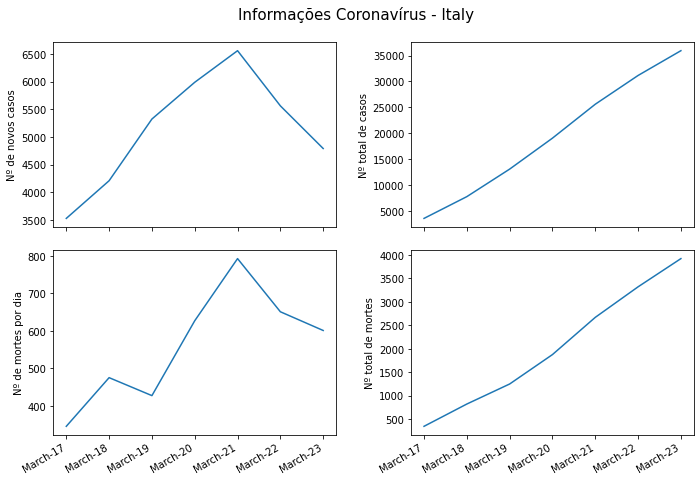

In [124]:
#@title Resumo Geral {display-mode: "form"}

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(7,7))
fig.suptitle("Informações Coronavírus - " + pais, y=1.05, fontsize = 15)
pass
fig.set_size_inches([10, 7])
axes[0][0].plot(days_month, cases)
axes[0][0].set(xlabel="")
axes[0][0].set(ylabel="Nº de novos casos")
pass
axes[0][1].plot(days_month, cases.cumsum(axis=0))
axes[0][1].set(xlabel="")
axes[0][1].set(ylabel="Nº total de casos")
pass
axes[1][0].plot(days_month, deaths)
axes[1][0].set(xlabel="")
axes[1][0].set(ylabel="Nº de mortes por dia")
pass
axes[1][1].plot(days_month, deaths.cumsum(axis=0))
axes[1][1].set(xlabel="")
axes[1][1].set(ylabel="Nº total de mortes")
plt.tight_layout()
fig.autofmt_xdate()

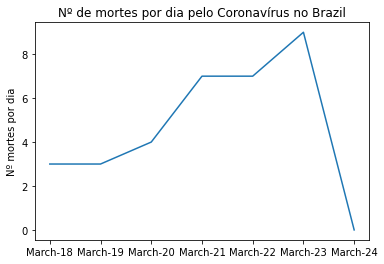

In [68]:
#@title Nº de mortes por dia {display-mode: "form"}

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot(days_month, deaths)
axes.set_title('Nº de mortes por dia pelo Coronavírus no ' + pais) 
axes.set(xlabel="")
axes.set(ylabel="Nº mortes por dia")
pass

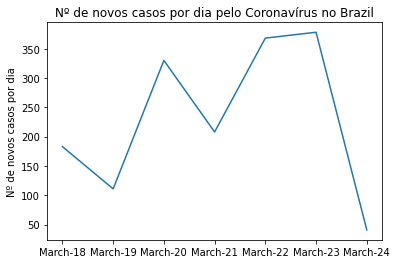

In [69]:
#@title Nº de novos casos por dia {display-mode: "form"}


import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot(days_month, cases)
axes.set_title('Nº de novos casos por dia pelo Coronavírus no ' + pais) 
axes.set(xlabel="")
axes.set(ylabel="Nº de novos casos por dia")
pass

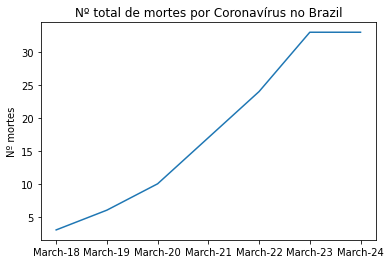

In [70]:
#@title Nº total de mortes {display-mode: "form"}


import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot(days_month, deaths.cumsum(axis=0))
axes.set_title('Nº total de mortes por Coronavírus no ' + pais) 
axes.set(xlabel="")
axes.set(ylabel="Nº mortes")
pass

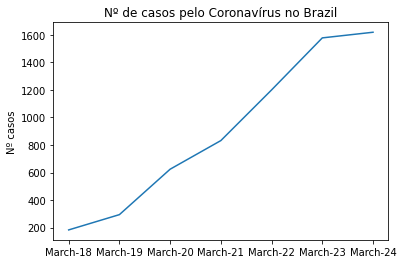

In [71]:
#@title Evolução do Nº de casos {display-mode: "form"}



import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.plot(days_month, cases.cumsum(axis=0))
axes.set_title('Nº de casos pelo Coronavírus no ' + pais) 
axes.set(xlabel="")
axes.set(ylabel="Nº casos")
pass

In [0]:
#@title Busca de notícias pelo id genérico - Problema: Notícias duplicadas {display-mode: "form"}

import requests
from lxml import html
import re

response = requests.get("https://www.worldometers.info/coronavirus/country/brazil/")
ht = html.fromstring(response.text)

dates = ht.cssselect('.news_date')
infos = ht.cssselect('.news_ul')

months = []
days = []
cases = []
deaths = []
for d, i in zip(dates, infos):
    r_date = re.search(r"(\w+)\s(\d+)", d.text_content())
    months.append(r_date.group(1))
    days.append(r_date.group(2))

    r_cases = re.search(r"(\d+) new cases", i.text_content())
    r_deaths = re.search(r"(\d+) new deaths", i.text_content())
    if r_cases is not None:
        cases.append(r_cases.group(1))
    else:
        cases.append("0")
    if r_deaths is not None:
        deaths.append(r_deaths.group(1))
    else:
        deaths.append("0")

